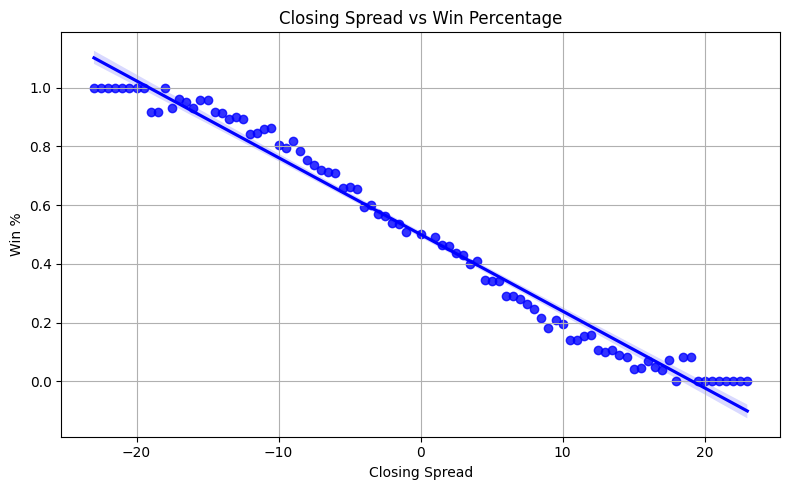

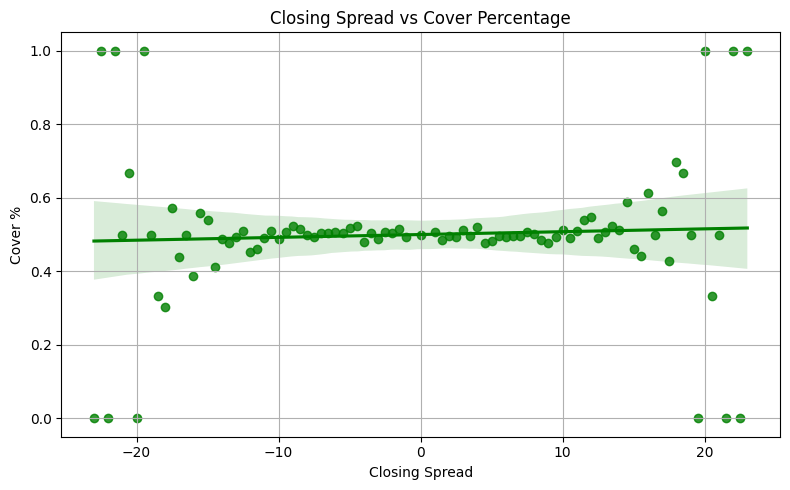

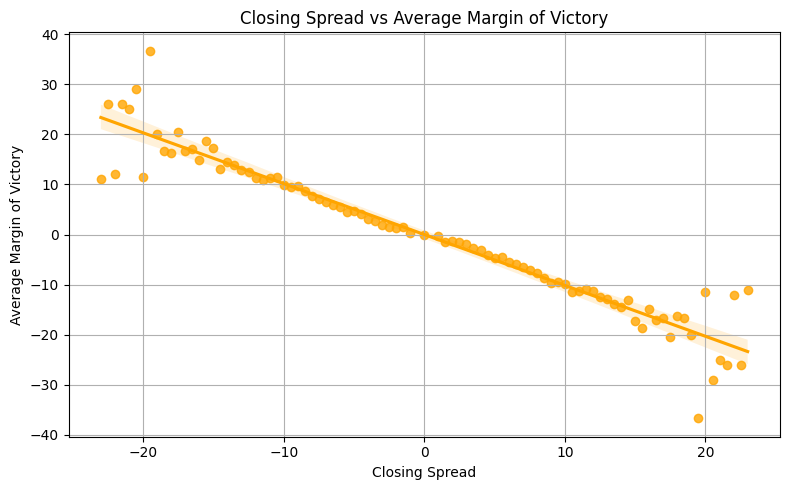

,Closing_Spread,Win_PCT,Cover_PCT,Average_MOV
Closing_Spread,1.000000,-0.990747,0.055189,-0.957983
Win_PCT,-0.990747,1.000000,-0.049282,0.953842
Cover_PCT,0.055189,-0.049282,1.000000,0.195374
Average_MOV,-0.957983,0.953842,0.195374,1.000000


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
team_stats_path = '/workspaces/Data-Science-Final-Project/NBA/data/official_team_advanced_stats.csv'
spread_stats_path = '/workspaces/Data-Science-Final-Project/NBA/data/all_team_cps_oddh.csv'

df_team = pd.read_csv(team_stats_path)
df_spread = pd.read_csv(spread_stats_path)

# Clean and prepare the spread data
df_spread['Win_PCT'] = df_spread['Win_PCT'].astype(str).str.replace('%', '').astype(float) / 100
df_spread['Cover_PCT'] = df_spread['Cover_PCT'].astype(str).str.replace('%', '').astype(float) / 100

# Filter necessary columns and drop missing values
df_plot = df_spread[['Closing_Spread', 'Win_PCT', 'Cover_PCT', 'Average_MOV']].dropna()

# Plot 1: Closing Spread vs Win Percentage
plt.figure(figsize=(8, 5))
sns.regplot(data=df_plot, x='Closing_Spread', y='Win_PCT', color='blue')
plt.title('Closing Spread vs Win Percentage')
plt.xlabel('Closing Spread')
plt.ylabel('Win %')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Closing Spread vs Cover Percentage
plt.figure(figsize=(8, 5))
sns.regplot(data=df_plot, x='Closing_Spread', y='Cover_PCT', color='green')
plt.title('Closing Spread vs Cover Percentage')
plt.xlabel('Closing Spread')
plt.ylabel('Cover %')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: Closing Spread vs Average Margin of Victory
plt.figure(figsize=(8, 5))
sns.regplot(data=df_plot, x='Closing_Spread', y='Average_MOV', color='orange')
plt.title('Closing Spread vs Average Margin of Victory')
plt.xlabel('Closing Spread')
plt.ylabel('Average Margin of Victory')
plt.grid(True)
plt.tight_layout()
plt.show()

# Show correlation matrix
correlation_matrix = df_plot.corr()
correlation_matrix


In [1]:
import pandas as pd
from scipy.stats import pearsonr

# Load the data
team_stats_path = '/workspaces/Data-Science-Final-Project/NBA/data/official_team_advanced_stats.csv'
spread_stats_path = '/workspaces/Data-Science-Final-Project/NBA/data/all_team_cps_oddh.csv'

df_team = pd.read_csv(team_stats_path)
df_spread = pd.read_csv(spread_stats_path)

# Clean and prepare the spread data
df_spread['Win_PCT'] = df_spread['Win_PCT'].astype(str).str.replace('%', '').astype(float) / 100
df_spread['Cover_PCT'] = df_spread['Cover_PCT'].astype(str).str.replace('%', '').astype(float) / 100

# Filter necessary columns and drop missing values
df_plot = df_spread[['Closing_Spread', 'Win_PCT', 'Cover_PCT', 'Average_MOV']].dropna()

# Calculate correlation coefficients and p-values
correlation_results = {}
columns = ['Win_PCT', 'Cover_PCT', 'Average_MOV']
for col in columns:
    corr, pval = pearsonr(df_plot['Closing_Spread'], df_plot[col])
    correlation_results[col] = {'correlation': corr, 'p-value': pval}

correlation_df = pd.DataFrame(correlation_results).T
correlation_df


,correlation,p-value
Win_PCT,-0.990747,5.436796e-79
Cover_PCT,0.055189,6.033483e-01
Average_MOV,-0.957983,4.699077e-50
